In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from generate_video import *

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
SEQ_LEN = 4

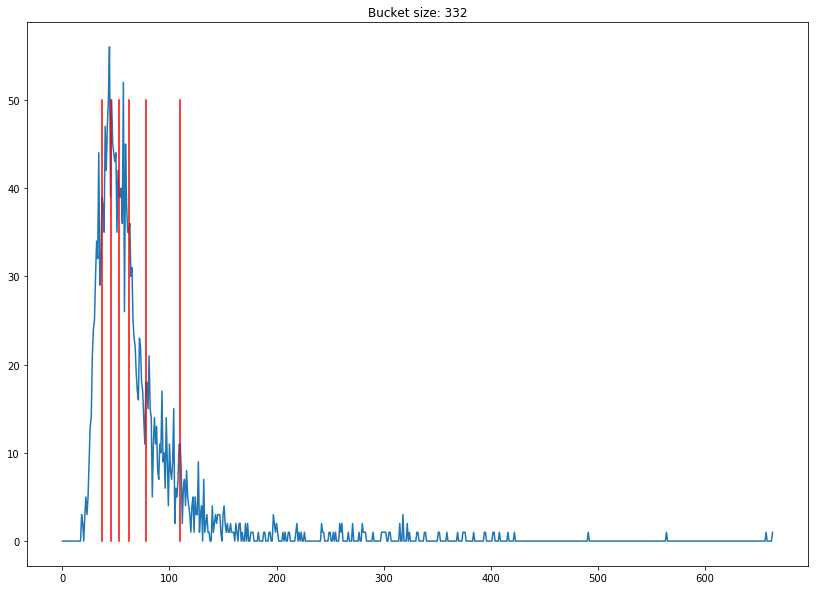

<bound method MultiVideoDataset.clear of <generate_video.MultiVideoDataset object at 0x7f6d645709e8>>


In [4]:
dset = MultiVideoDataset(seqlen=SEQ_LEN, speedup=4, shuffle=False, bins=7, plot_buckets=True)
print(dset.clear)

In [6]:
(frames, mask_pafs, mask_heats), (pafs, heats), reset_flag = dset.next_batch(bsize=1)

print(frames.shape)
print(mask_pafs.shape, mask_heats.shape)
print(pafs.shape, heats.shape)

(1, 4, 368, 368, 3)
(1, 4, 46, 46, 38) (1, 4, 46, 46, 19)
(1, 4, 46, 46, 38) (1, 4, 46, 46, 19)


In [9]:
def interleave(LA, LB):
    batch = []
    for bb in range(len(LA)):
        joined = []
        for ii in range(len(LA[bb])):
            joined += [LA[bb][ii], LB[bb][ii]]
        batch.append(joined)
    return batch

joined = interleave(pafs, heats)
print(len(joined))
print(len(joined[0]))

1
8


In [ ]:
import matplotlib.pyplot as plt

# ensure augments behaves correctly

# dset.clear()
for vid in dset.streams: vid.reset()

plt.figure(figsize=(14, 4))
for ii in range(4):
    (frames, mask_pafs, mask_heats), (pafs, heats), reset = dset.next_batch(bsize=1)
    for sii in range(SEQ_LEN):
        plt.subplot(2, 8, ii*SEQ_LEN+sii+1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(frames[0][sii], cv2.COLOR_BGR2RGB))
#         plt.imshow(cv2)
plt.show()
plt.close()

In [ ]:
import matplotlib.pyplot as plt

# demonstrate that videos get played end-to-end

for video in dset.streams: video.reset()

plt.figure(figsize=(14, 14))
for ii in range(25):
    (frames, mask_pafs, mask_heats), (pafs, heats), reset = dset.next_batch(bsize=1)
    for sii in range(SEQ_LEN):
        plt.subplot(10, 10, ii*SEQ_LEN+sii+1)
        plt.gca().set_title('Reset' if  reset else '')
        plt.axis('off')
        plt.imshow(cv2.cvtColor(frames[0][sii], cv2.COLOR_BGR2RGB))
        mask = cv2.resize(mask_heats[0][sii][:, :, 0], (0,0), fx=8, fy=8)
        plt.imshow(mask.astype(np.float32), alpha=0.5)
        points = cv2.resize(np.sum(heats[0][sii][:, :, :-1].astype(np.float32), -1), (0,0), fx=8, fy=8)
        plt.imshow(points.astype(np.float32), alpha=0.5)
plt.show()
plt.close()

In [ ]:
# demonstrate that videos started in the same batch will share playback length

dset.clear()
# for video in dset.streams: video.reset()

plt.figure(figsize=(14, 14))
for ii in range(10):
  
    (frames, mask_pafs, mask_heats), (pafs, heats) = dset.next_batch(bsize=2)
    for jj in range(2):  
        for kk in range(SEQ_LEN):
            plt.subplot(10, 8, ii*8 + SEQ_LEN*jj + kk + 1)
            plt.imshow(cv2.cvtColor(frames[jj][kk], cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

In [ ]:
import time
import os, sys
# measure bach time

hist = []
for ii in range(100):
    t0 = time.time()
    dset.next_batch(bsize=6)
    dt = time.time() - t0
    sys.stdout.write('%d: %.2f\r' % (ii, dt))
    hist.append(dt)
    sys.stdout.flush()

avg = np.mean(hist)
print(avg * 10000)
print(avg)

In [ ]:
maxiter = 100 * 100
for ii in range(maxiter):
    dset.next_batch(bsize=6)
    sys.stdout.write('%d/%d\r' % (ii+1, ))
    sys.stdout.flush()